In [34]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [21]:
#create random sets of lat+long combos
lats = np.random.uniform(-90.000,90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
#add lats and lngs to a list
coordinates=list(lat_lngs)

In [23]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

45.32793562593832 33.65372163075813
42.88550426446761 24.540698537535945
4.0040994011378785 129.4985823994037
6.929088848348229 68.6071619118949
-62.966131294346084 -123.41733419954097
-76.34672865495813 51.201757976166476
26.561814551780074 -43.97530587878265
87.3676670618226 -119.29235284719951
-74.58325834580539 -58.87392593029679
38.27506630719006 3.6392594713807966
20.384082515601392 -132.6987263799374
71.29508409975989 93.26858222678385
29.054492980457184 75.93117197470562
-48.22038118395937 123.70345406117934
-64.16684971742725 -14.424195119251692
22.502190172972476 74.14931467850968
79.14508656548017 -45.60564430235772
10.804799215720521 -113.5994014997359
71.8190478346007 -136.66492358289997
86.42141350661751 -87.09195913112737
38.47250224408501 32.08306122945234
-12.65141898164083 116.94034140177126
17.669371255244826 -36.87091532842962
29.471417419193372 122.02911164990286
28.907466467943394 -36.62325058877636
23.331854156757288 0.1421575885687787
-23.2626936741042 45.476331

-1.8178075544554844 -103.9150744721671
44.937664306810575 92.86993652293773
-70.98973194799503 -39.369078753260595
46.15945574440698 83.15752367691778
39.20934783570502 161.46366778030745
67.28684631386551 2.7643131554073364
-43.946207251492716 -81.77931587780401
-0.6458100135250078 -176.6257232402888
78.80393997410667 113.48792923827045
-1.808643866760704 155.01278043704917
-52.62501906782905 -162.50544434234888
27.509626883875413 107.70011238364191
49.37676331502246 -119.13221177465725
64.46108173409596 35.352981988393594
-52.0753484988822 162.09272886359548
-81.86174793124381 2.329161559717022
62.41692999131678 -77.08684206681885
70.86022972183946 -13.391533701355144
-70.64813134824938 17.285316461410957
56.98563794450169 -171.46253205791615
-30.83739787873612 87.54069226192036
-73.89343954367507 -170.46369935436655
88.97038900100091 -105.17887042648084
-17.716264365141697 97.79539336163344
74.34316363679636 -129.33355075741122
6.3598603186071045 15.419834401436873
43.43184490314456

In [24]:
# use citipy script (imported up top)
# create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

647

In [25]:
print(cities)

['pervomayskoye', 'trojan', 'ternate', 'kulhudhuffushi', 'rikitea', 'port alfred', 'ribeira grande', 'tuktoyaktuk', 'ushuaia', 'felanitx', 'lompoc', 'talnakh', 'hansi', 'albany', 'cape town', 'alirajpur', 'ilulissat', 'san patricio', 'aklavik', 'qaanaaq', 'aksehir', 'praya', 'ponta do sol', 'shenjiamen', 'tessalit', 'sakaraha', 'lagoa', 'samusu', 'georgetown', 'santa cruz', 'rawson', 'aleksandrovsk-sakhalinskiy', 'jamestown', 'taolanaro', 'arraial do cabo', 'bredasdorp', 'chokurdakh', 'umzimvubu', 'maracacume', 'aksu', 'nemuro', 'punta arenas', 'margate', 'merauke', 'constitucion', 'panzhihua', 'mamlyutka', 'busselton', 'butaritari', 'comodoro rivadavia', 'kaitangata', 'kapaa', 'straumen', 'geraldton', 'upernavik', 'avarua', 'wanderlandia', 'nador', 'yellowknife', 'bluff', 'khatanga', 'otukpo', 'bandarbeyla', 'neiafu', 'airai', 'omsukchan', 'manacor', 'ayacucho', 'aripuana', 'lingao', 'surt', 'college', 'narsaq', 'belmonte', 'yumen', 'tasiilaq', 'atuona', 'aranos', 'tolyatti', 'mar del

In [26]:
#weather data section
#using APIs

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#create empty list to hold the weather data
city_data=[]

#print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

#creat counters
record_count=1
set_count=1

#loop through list of cities to build the city URLs
#using counters to keep track of both the list we're building and how many lists

for i, city in enumerate(cities):
    
    #group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    #create endpoint URL with each city
    city_url = url +"&q=" + city.replace(" ","+")
    
    #log the url, record and set counters and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
       
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | pervomayskoye
Processing Record 2 of Set 1 | trojan
Processing Record 3 of Set 1 | ternate
Processing Record 4 of Set 1 | kulhudhuffushi
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | felanitx
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | hansi
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | alirajpur
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | aksehir
Processing Record 22 of Set 1 | praya
Processing Record 23 of Set 1 | ponta do sol
P

Processing Record 39 of Set 4 | louis trichardt
Processing Record 40 of Set 4 | trairi
Processing Record 41 of Set 4 | tiruchchendur
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | muhos
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | morro bay
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | alta floresta
Processing Record 50 of Set 4 | acapulco
Processing Record 1 of Set 5 | bilibino
Processing Record 2 of Set 5 | aasiaat
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | inuvik
Processing Record 7 of Set 5 | saint-augustin
Processing Record 8 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 5 | high rock
Processing Record 10 of Set 5 | carnarvon
Processing Record

Processing Record 28 of Set 8 | joetsu
Processing Record 29 of Set 8 | havre
Processing Record 30 of Set 8 | pisco
Processing Record 31 of Set 8 | kirakira
Processing Record 32 of Set 8 | souillac
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | bossangoa
Processing Record 35 of Set 8 | likasi
Processing Record 36 of Set 8 | kuche
City not found. Skipping...
Processing Record 37 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 8 | bolotnoye
Processing Record 39 of Set 8 | okha
Processing Record 40 of Set 8 | byron bay
Processing Record 41 of Set 8 | kuvshinovo
Processing Record 42 of Set 8 | erzin
Processing Record 43 of Set 8 | innisfail
Processing Record 44 of Set 8 | port macquarie
Processing Record 45 of Set 8 | buariki
City not found. Skipping...
Processing Record 46 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 8 | huarmey
Processing Record 48 of Set 8 | atikokan
Processing Record 49 of Set 8 | santa m

Processing Record 16 of Set 12 | la palma
Processing Record 17 of Set 12 | baykalsk
Processing Record 18 of Set 12 | chicama
Processing Record 19 of Set 12 | gat
Processing Record 20 of Set 12 | utiroa
City not found. Skipping...
Processing Record 21 of Set 12 | yar-sale
Processing Record 22 of Set 12 | samarai
Processing Record 23 of Set 12 | rudnogorsk
Processing Record 24 of Set 12 | hasanabad
Processing Record 25 of Set 12 | awjilah
Processing Record 26 of Set 12 | nizwa
Processing Record 27 of Set 12 | tecoanapa
Processing Record 28 of Set 12 | pacifica
Processing Record 29 of Set 12 | vila
Processing Record 30 of Set 12 | kushima
Processing Record 31 of Set 12 | linhares
Processing Record 32 of Set 12 | nova olinda do norte
Processing Record 33 of Set 12 | santhia
Processing Record 34 of Set 12 | otradnoye
Processing Record 35 of Set 12 | sovetsk
Processing Record 36 of Set 12 | berlevag
Processing Record 37 of Set 12 | pacific grove
Processing Record 38 of Set 12 | pokhara
Proce

In [27]:
len(city_data)

594

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pervomayskoye,43.92,46.71,56.97,94,99,7.58,RU,2020-10-31 17:11:13
1,Trojan,53.79,20.24,44.01,93,75,1.12,PL,2020-10-31 17:11:13
2,Ternate,0.80,127.40,82.02,77,10,8.61,ID,2020-10-31 17:10:47
3,Kulhudhuffushi,6.62,73.07,83.80,68,99,5.70,MV,2020-10-31 17:11:13
4,Rikitea,-23.12,-134.97,74.95,71,7,7.65,PF,2020-10-31 17:11:13
5,Port Alfred,-33.59,26.89,65.26,74,85,15.32,ZA,2020-10-31 17:11:09
6,Ribeira Grande,38.52,-28.70,69.80,94,75,18.34,PT,2020-10-31 17:11:13
7,Tuktoyaktuk,69.45,-133.04,-4.00,83,40,4.70,CA,2020-10-31 17:11:13
8,Ushuaia,-54.80,-68.30,55.40,54,75,5.55,AR,2020-10-31 17:08:27
9,Felanitx,39.47,3.15,69.80,73,0,6.93,ES,2020-10-31 17:11:13


In [29]:
#reorder columns
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pervomayskoye,RU,2020-10-31 17:11:13,43.92,46.71,56.97,94,99,7.58
1,Trojan,PL,2020-10-31 17:11:13,53.79,20.24,44.01,93,75,1.12
2,Ternate,ID,2020-10-31 17:10:47,0.80,127.40,82.02,77,10,8.61
3,Kulhudhuffushi,MV,2020-10-31 17:11:13,6.62,73.07,83.80,68,99,5.70
4,Rikitea,PF,2020-10-31 17:11:13,-23.12,-134.97,74.95,71,7,7.65


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/31/20'

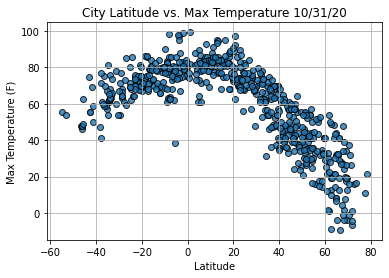

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

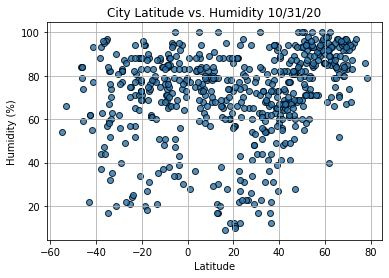

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

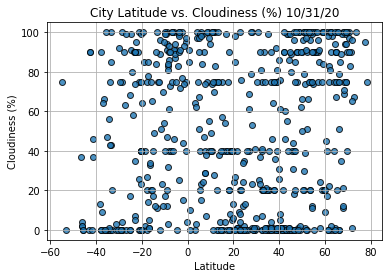

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

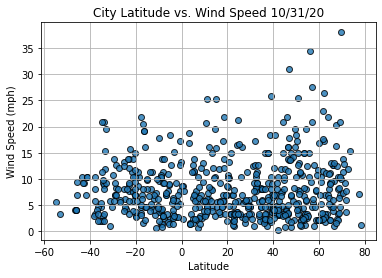

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [44]:
#create hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

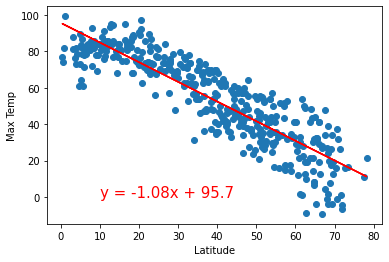

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere /n for Maximum Temperature', 'Max Temp',(10,0))


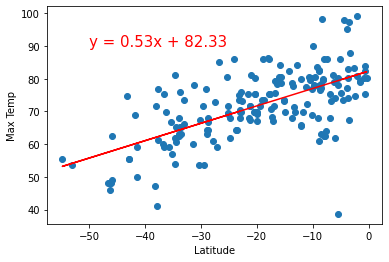

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

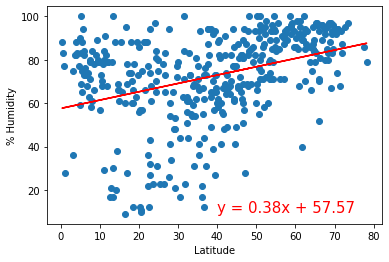

In [50]:
# Linear regression on the Northern Hemisphere - humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


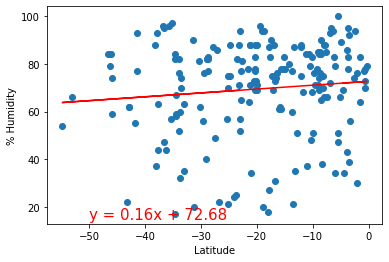

In [51]:
#Linear regression on the Southern Hemisphere - humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

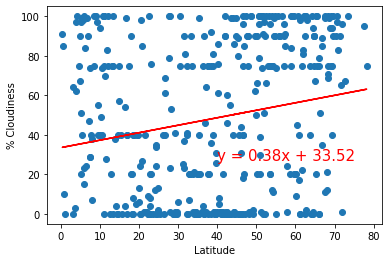

In [55]:
# Linear regression on the Northern Hemisphere - cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,27))

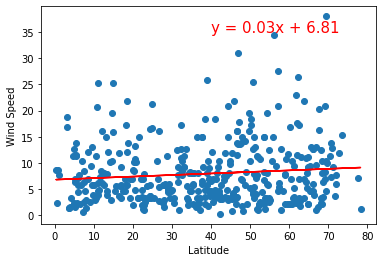

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


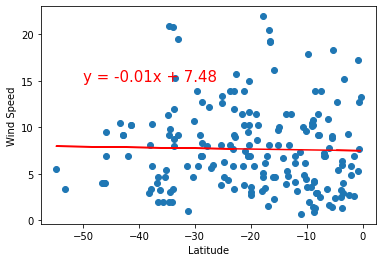

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,15))
